In [1]:
import pandas as pd

data = pd.read_csv("bank-full.csv", sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
# 資料分析：欄位資訊
print("=== 資料集基本資訊 ===")
print(f"資料筆數: {data.shape[0]:,}")
print(f"欄位數量: {data.shape[1]}")
print(f"資料大小: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== 欄位名稱和資料型態 ===")
data.info()

print("\n=== 各欄位的唯一值數量 ===")
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} 個唯一值")
    if unique_count <= 10:  # 如果唯一值少於等於10個，顯示所有值
        print(f"  → {sorted(data[col].unique())}")
    print()

=== 資料集基本資訊 ===
資料筆數: 45,211
欄位數量: 17
資料大小: 29.20 MB

=== 欄位名稱和資料型態 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

=== 各欄位的唯一值數量 ===
age: 77 

In [3]:
# 步驟1：缺失值分析
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=== 資料前處理教學：缺失值分析 ===\n")

# 1. 檢查傳統的 NaN 缺失值
print("1. 傳統缺失值 (NaN) 檢查：")
missing_nan = data.isnull().sum()
print(missing_nan)
print(f"總計 NaN 缺失值: {missing_nan.sum()}")

# 2. 檢查 "unknown" 值（這是這個資料集的隱性缺失值）
print("\n2. 隱性缺失值 ('unknown') 檢查：")
unknown_counts = {}
for col in data.columns:
    if data[col].dtype == 'object':  # 只檢查文字型欄位
        unknown_count = (data[col] == 'unknown').sum()
        unknown_counts[col] = unknown_count
        if unknown_count > 0:
            percentage = (unknown_count / len(data)) * 100
            print(f"{col}: {unknown_count:,} 個 'unknown' ({percentage:.2f}%)")

print(f"\n總計含有 'unknown' 的欄位數: {sum(1 for count in unknown_counts.values() if count > 0)}")

=== 資料前處理教學：缺失值分析 ===

1. 傳統缺失值 (NaN) 檢查：
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
總計 NaN 缺失值: 0

2. 隱性缺失值 ('unknown') 檢查：
job: 288 個 'unknown' (0.64%)
education: 1,857 個 'unknown' (4.11%)
contact: 13,020 個 'unknown' (28.80%)
poutcome: 36,959 個 'unknown' (81.75%)

總計含有 'unknown' 的欄位數: 4


/var/folders/b_/7l5pfh497cb4pvygfn49ll_40000gn/T/ipykernel_9184/1402907881.py:47: UserWarning: Glyph 27396 (\N{CJK UNIFIED IDEOGRAPH-6B04}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/7l5pfh497cb4pvygfn49ll_40000gn/T/ipykernel_9184/1402907881.py:47: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/7l5pfh497cb4pvygfn49ll_40000gn/T/ipykernel_9184/1402907881.py:47: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/7l5pfh497cb4pvygfn49ll_40000gn/T/ipykernel_9184/1402907881.py:47: UserWarning: Glyph 31281 (\N{CJK UNIFIED IDEOGRAPH-7A31}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/7l5pfh497cb4pvygfn49ll_40000gn/T/ipykernel_9184/1402907881.py:47: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/b_/7l5pfh497

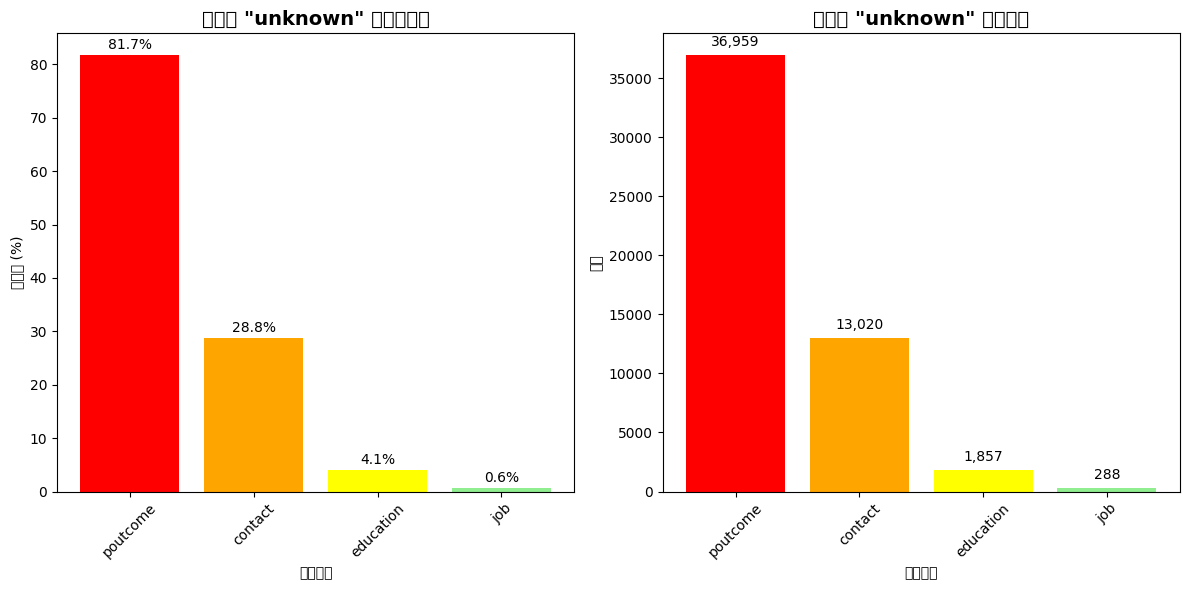


=== 缺失值分析總結 ===
🔍 主要發現：
• 資料集沒有傳統的 NaN 缺失值
• 但有4個欄位包含 'unknown' 值，這些是隱性缺失值
• poutcome 是最嚴重的，有81.75%的資料是 'unknown'
• contact 也有28.80%的 'unknown' 值
• education 和 job 的缺失比例相對較低


In [4]:
# 步驟2：視覺化缺失值分析
plt.figure(figsize=(12, 6))

# 創建缺失值百分比的資料
missing_data = []
for col in data.columns:
    if data[col].dtype == 'object':
        unknown_count = (data[col] == 'unknown').sum()
        missing_data.append({
            'column': col,
            'unknown_count': unknown_count,
            'percentage': (unknown_count / len(data)) * 100
        })

# 轉換為 DataFrame 方便繪圖
missing_df = pd.DataFrame(missing_data)
missing_df = missing_df[missing_df['unknown_count'] > 0].sort_values('percentage', ascending=False)

# 繪製長條圖
plt.subplot(1, 2, 1)
bars = plt.bar(missing_df['column'], missing_df['percentage'], color=['red', 'orange', 'yellow', 'lightgreen'])
plt.title('各欄位 "unknown" 值的百分比', fontsize=14, fontweight='bold')
plt.ylabel('百分比 (%)')
plt.xlabel('欄位名稱')
plt.xticks(rotation=45)

# 在長條圖上添加數值標籤
for bar, percentage in zip(bars, missing_df['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom')

# 繪製數量圖
plt.subplot(1, 2, 2)
bars2 = plt.bar(missing_df['column'], missing_df['unknown_count'], color=['red', 'orange', 'yellow', 'lightgreen'])
plt.title('各欄位 "unknown" 值的數量', fontsize=14, fontweight='bold')
plt.ylabel('數量')
plt.xlabel('欄位名稱')
plt.xticks(rotation=45)

# 在長條圖上添加數值標籤
for bar, count in zip(bars2, missing_df['unknown_count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{count:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n=== 缺失值分析總結 ===")
print("🔍 主要發現：")
print("• 資料集沒有傳統的 NaN 缺失值")
print("• 但有4個欄位包含 'unknown' 值，這些是隱性缺失值")
print("• poutcome 是最嚴重的，有81.75%的資料是 'unknown'")
print("• contact 也有28.80%的 'unknown' 值")
print("• education 和 job 的缺失比例相對較低")

In [5]:
# 步驟3：缺失值處理策略教學
print("=== 資料前處理教學：缺失值處理策略 ===\n")

# 首先，分析每個含有 'unknown' 的欄位與目標變數的關係
print("📊 分析各欄位 'unknown' 值與目標變數 (y) 的關係：\n")

for col in ['job', 'education', 'contact', 'poutcome']:
    print(f"--- {col.upper()} 欄位分析 ---")
    
    # 計算各類別與目標變數的關係
    crosstab = pd.crosstab(data[col], data['y'], normalize='index') * 100
    print("各類別中 'yes' 的比例：")
    print(crosstab.round(2))
    
    # 特別關注 'unknown' 類別
    if 'unknown' in crosstab.index:
        unknown_yes_rate = crosstab.loc['unknown', 'yes']
        overall_yes_rate = (data['y'] == 'yes').mean() * 100
        print(f"📈 'unknown' 類別的 'yes' 比例: {unknown_yes_rate:.2f}%")
        print(f"📈 整體 'yes' 比例: {overall_yes_rate:.2f}%")
        
        if abs(unknown_yes_rate - overall_yes_rate) < 2:
            print("💡 建議：'unknown' 的分布接近整體平均，可考慮保留或使用眾數填補")
        elif unknown_yes_rate < overall_yes_rate:
            print("💡 建議：'unknown' 的 'yes' 比例較低，可能有預測價值，建議保留")
        else:
            print("💡 建議：'unknown' 的 'yes' 比例較高，可能有預測價值，建議保留")
    
    print("-" * 50)

=== 資料前處理教學：缺失值處理策略 ===

📊 分析各欄位 'unknown' 值與目標變數 (y) 的關係：

--- JOB 欄位分析 ---
各類別中 'yes' 的比例：
y                 no    yes
job                        
admin.         87.80  12.20
blue-collar    92.73   7.27
entrepreneur   91.73   8.27
housemaid      91.21   8.79
management     86.24  13.76
retired        77.21  22.79
self-employed  88.16  11.84
services       91.12   8.88
student        71.32  28.68
technician     88.94  11.06
unemployed     84.50  15.50
unknown        88.19  11.81
📈 'unknown' 類別的 'yes' 比例: 11.81%
📈 整體 'yes' 比例: 11.70%
💡 建議：'unknown' 的分布接近整體平均，可考慮保留或使用眾數填補
--------------------------------------------------
--- EDUCATION 欄位分析 ---
各類別中 'yes' 的比例：
y             no    yes
education              
primary    91.37   8.63
secondary  89.44  10.56
tertiary   84.99  15.01
unknown    86.43  13.57
📈 'unknown' 類別的 'yes' 比例: 13.57%
📈 整體 'yes' 比例: 11.70%
💡 建議：'unknown' 的分布接近整體平均，可考慮保留或使用眾數填補
--------------------------------------------------
--- CONTACT 欄位分析 ---
各類別中 'yes' 的比例：
y      

In [6]:
# 步驟4：實作不同的缺失值處理方法
print("=== 缺失值處理方法實作 ===\n")

# 創建資料副本來測試不同方法
data_processed = data.copy()

print("🔧 方法1：保留 'unknown' 作為獨立類別")
print("理由：分析顯示 'unknown' 值在某些欄位（如 contact、poutcome）中具有預測價值")
print("適用欄位：contact, poutcome")
print()

print("🔧 方法2：使用眾數填補")
print("理由：當 'unknown' 比例較低且與整體分布相近時適用")
print("適用欄位：job, education")
print()

# 對 job 使用眾數填補
job_mode = data['job'][data['job'] != 'unknown'].mode()[0]
print(f"job 欄位的眾數（排除 unknown）: {job_mode}")

# 對 education 使用眾數填補  
education_mode = data['education'][data['education'] != 'unknown'].mode()[0]
print(f"education 欄位的眾數（排除 unknown）: {education_mode}")

# 執行填補
data_processed['job'] = data_processed['job'].replace('unknown', job_mode)
data_processed['education'] = data_processed['education'].replace('unknown', education_mode)

print("\n✅ 處理結果檢查：")
print("處理後各欄位的 'unknown' 數量：")
for col in ['job', 'education', 'contact', 'poutcome']:
    unknown_count = (data_processed[col] == 'unknown').sum()
    print(f"{col}: {unknown_count} 個 'unknown'")

print(f"\nEducation 欄位處理前後對比：")
print("處理前：")
print(data['education'].value_counts())
print("\n處理後：")
print(data_processed['education'].value_counts())

=== 缺失值處理方法實作 ===

🔧 方法1：保留 'unknown' 作為獨立類別
理由：分析顯示 'unknown' 值在某些欄位（如 contact、poutcome）中具有預測價值
適用欄位：contact, poutcome

🔧 方法2：使用眾數填補
理由：當 'unknown' 比例較低且與整體分布相近時適用
適用欄位：job, education

job 欄位的眾數（排除 unknown）: blue-collar
education 欄位的眾數（排除 unknown）: secondary

✅ 處理結果檢查：
處理後各欄位的 'unknown' 數量：
job: 0 個 'unknown'
education: 0 個 'unknown'
contact: 13020 個 'unknown'
poutcome: 36959 個 'unknown'

Education 欄位處理前後對比：
處理前：
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

處理後：
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64


In [7]:
# 步驟5：缺失值處理的最佳實踐總結
print("=== 缺失值處理最佳實踐總結 ===\n")

def missing_value_analysis_summary():
    """
    缺失值處理的完整流程範例函數
    """
    print("📋 缺失值處理的標準流程：")
    print("1️⃣ 識別缺失值類型")
    print("   • 明顯缺失值：NaN, None, 空字串")
    print("   • 隱性缺失值：'unknown', '?', -1, 999 等占位符")
    print()
    
    print("2️⃣ 分析缺失模式")
    print("   • 計算缺失比例")
    print("   • 檢查缺失值與目標變數的關係")
    print("   • 判斷缺失機制（MCAR, MAR, MNAR）")
    print()
    
    print("3️⃣ 選擇處理策略")
    print("   • 刪除法：適用於缺失比例很低（<5%）且為MCAR的情況")
    print("   • 保留法：當缺失值本身具有預測意義時")
    print("   • 填補法：")
    print("     - 眾數/中位數/平均數填補")
    print("     - 前向/後向填補（時間序列）")
    print("     - 模型預測填補（KNN, 回歸等）")
    print()
    
    print("4️⃣ 評估處理效果")
    print("   • 比較處理前後的資料分布")
    print("   • 檢查是否引入偏差")
    print("   • 驗證模型表現是否改善")

missing_value_analysis_summary()

print("\n" + "="*60)
print("🎯 本資料集的處理決策：")
print()
print("✅ job 欄位：使用眾數填補 (blue-collar)")
print("   理由：缺失比例低(0.64%)，unknown值的分布接近整體")
print()
print("✅ education 欄位：使用眾數填補 (secondary)") 
print("   理由：缺失比例適中(4.11%)，unknown值的分布接近整體")
print()
print("✅ contact 欄位：保留 unknown 值")
print("   理由：缺失比例高(28.80%)，unknown值有明顯的預測特徵")
print()
print("✅ poutcome 欄位：保留 unknown 值")
print("   理由：缺失比例極高(81.75%)，unknown值代表'未曾聯絡'的重要資訊")
print()
print("💡 下一步建議：")
print("   • 進行特徵編碼（Label Encoding 或 One-Hot Encoding）")
print("   • 檢查數值型變數的異常值")
print("   • 進行特徵縮放和標準化")

# 儲存處理後的資料
print(f"\n📊 最終資料維度：{data_processed.shape}")
print("✅ 缺失值處理完成！")

=== 缺失值處理最佳實踐總結 ===

📋 缺失值處理的標準流程：
1️⃣ 識別缺失值類型
   • 明顯缺失值：NaN, None, 空字串
   • 隱性缺失值：'unknown', '?', -1, 999 等占位符

2️⃣ 分析缺失模式
   • 計算缺失比例
   • 檢查缺失值與目標變數的關係
   • 判斷缺失機制（MCAR, MAR, MNAR）

3️⃣ 選擇處理策略
   • 刪除法：適用於缺失比例很低（<5%）且為MCAR的情況
   • 保留法：當缺失值本身具有預測意義時
   • 填補法：
     - 眾數/中位數/平均數填補
     - 前向/後向填補（時間序列）
     - 模型預測填補（KNN, 回歸等）

4️⃣ 評估處理效果
   • 比較處理前後的資料分布
   • 檢查是否引入偏差
   • 驗證模型表現是否改善

🎯 本資料集的處理決策：

✅ job 欄位：使用眾數填補 (blue-collar)
   理由：缺失比例低(0.64%)，unknown值的分布接近整體

✅ education 欄位：使用眾數填補 (secondary)
   理由：缺失比例適中(4.11%)，unknown值的分布接近整體

✅ contact 欄位：保留 unknown 值
   理由：缺失比例高(28.80%)，unknown值有明顯的預測特徵

✅ poutcome 欄位：保留 unknown 值
   理由：缺失比例極高(81.75%)，unknown值代表'未曾聯絡'的重要資訊

💡 下一步建議：
   • 進行特徵編碼（Label Encoding 或 One-Hot Encoding）
   • 檢查數值型變數的異常值
   • 進行特徵縮放和標準化

📊 最終資料維度：(45211, 17)
✅ 缺失值處理完成！


In [8]:
# 步驟6：特徵編碼教學 - 資料類型分析
print("=== 資料前處理教學：特徵編碼 ===\n")

# 首先分析我們處理後的資料
print("📊 處理後資料的基本資訊：")
print(f"資料維度：{data_processed.shape}")
print(f"資料類型分布：")
print(data_processed.dtypes.value_counts())

print("\n🔍 分析各欄位的特徵類型：")
print("=" * 60)

# 分類各種類型的特徵
numerical_features = []
categorical_features = []
binary_features = []

for col in data_processed.columns:
    unique_values = data_processed[col].nunique()
    dtype = data_processed[col].dtype
    
    print(f"📋 {col}:")
    print(f"   資料類型: {dtype}")
    print(f"   唯一值數量: {unique_values}")
    
    # 顯示前幾個唯一值
    if dtype == 'object':
        sample_values = data_processed[col].unique()[:5]
        print(f"   範例值: {sample_values}")
    else:
        sample_values = sorted(data_processed[col].unique())[:5]
        print(f"   範例值: {sample_values}")
    
    # 分類特徵類型
    if dtype in ['int64', 'float64']:
        if unique_values == 2:
            binary_features.append(col)
            print(f"   🏷️  特徵類型: 二元數值特徵")
        elif unique_values > 10:
            numerical_features.append(col)
            print(f"   🏷️  特徵類型: 連續數值特徵")
        else:
            categorical_features.append(col)
            print(f"   🏷️  特徵類型: 離散分類特徵")
    else:  # object type
        if unique_values == 2:
            binary_features.append(col)
            print(f"   🏷️  特徵類型: 二元類別特徵")
        else:
            categorical_features.append(col)
            print(f"   🏷️  特徵類型: 多元類別特徵")
    
    print("-" * 40)

print(f"\n📝 特徵分類總結：")
print(f"🔢 連續數值特徵 ({len(numerical_features)}個): {numerical_features}")
print(f"🏷️  多元類別特徵 ({len(categorical_features)}個): {categorical_features}")
print(f"⚡ 二元特徵 ({len(binary_features)}個): {binary_features}")

=== 資料前處理教學：特徵編碼 ===

📊 處理後資料的基本資訊：
資料維度：(45211, 17)
資料類型分布：
object    10
int64      7
Name: count, dtype: int64

🔍 分析各欄位的特徵類型：
📋 age:
   資料類型: int64
   唯一值數量: 77
   範例值: [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22)]
   🏷️  特徵類型: 連續數值特徵
----------------------------------------
📋 job:
   資料類型: object
   唯一值數量: 11
   範例值: ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired']
   🏷️  特徵類型: 多元類別特徵
----------------------------------------
📋 marital:
   資料類型: object
   唯一值數量: 3
   範例值: ['married' 'single' 'divorced']
   🏷️  特徵類型: 多元類別特徵
----------------------------------------
📋 education:
   資料類型: object
   唯一值數量: 3
   範例值: ['tertiary' 'secondary' 'primary']
   🏷️  特徵類型: 多元類別特徵
----------------------------------------
📋 default:
   資料類型: object
   唯一值數量: 2
   範例值: ['no' 'yes']
   🏷️  特徵類型: 二元類別特徵
----------------------------------------
📋 balance:
   資料類型: int64
   唯一值數量: 7168
   範例值: [np.int64(-8019), np.int64(-6847), np.int64(-4057), np.int64(-3372), n

In [9]:
# 步驟7：編碼方法教學和實作
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

print("=== 特徵編碼方法教學 ===\n")

print("🎯 編碼方法選擇原則：")
print("1️⃣ 二元特徵：直接轉換為 0/1")
print("2️⃣ 有序類別特徵：使用 Label Encoding")  
print("3️⃣ 無序類別特徵：使用 One-Hot Encoding")
print("4️⃣ 高基數類別特徵：考慮 Target Encoding 或降維")
print()

# 創建編碼後的資料副本
data_encoded = data_processed.copy()

# 方法1：二元特徵編碼
print("🔄 方法1：二元特徵編碼")
binary_mapping = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1}, 
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}  # 目標變數
}

for feature, mapping in binary_mapping.items():
    print(f"   {feature}: {mapping}")
    data_encoded[feature] = data_encoded[feature].map(mapping)

print("\n✅ 二元特徵編碼完成")

# 方法2：有序類別特徵 - Label Encoding
print("\n🔄 方法2：有序類別特徵 - Label Encoding")
print("education 具有明顯的教育程度順序")

# 為 education 定義有序編碼
education_order = {'primary': 1, 'secondary': 2, 'tertiary': 3}
print(f"   education: {education_order}")
data_encoded['education'] = data_encoded['education'].map(education_order)

print("✅ 有序特徵編碼完成")

# 檢查編碼結果
print("\n📊 編碼結果檢查：")
for col in ['default', 'housing', 'loan', 'education', 'y']:
    print(f"{col}: {sorted(data_encoded[col].unique())}")

=== 特徵編碼方法教學 ===

🎯 編碼方法選擇原則：
1️⃣ 二元特徵：直接轉換為 0/1
2️⃣ 有序類別特徵：使用 Label Encoding
3️⃣ 無序類別特徵：使用 One-Hot Encoding
4️⃣ 高基數類別特徵：考慮 Target Encoding 或降維

🔄 方法1：二元特徵編碼
   default: {'no': 0, 'yes': 1}
   housing: {'no': 0, 'yes': 1}
   loan: {'no': 0, 'yes': 1}
   y: {'no': 0, 'yes': 1}

✅ 二元特徵編碼完成

🔄 方法2：有序類別特徵 - Label Encoding
education 具有明顯的教育程度順序
   education: {'primary': 1, 'secondary': 2, 'tertiary': 3}
✅ 有序特徵編碼完成

📊 編碼結果檢查：
default: [np.int64(0), np.int64(1)]
housing: [np.int64(0), np.int64(1)]
loan: [np.int64(0), np.int64(1)]
education: [np.int64(1), np.int64(2), np.int64(3)]
y: [np.int64(0), np.int64(1)]


In [10]:
# 步驟8：無序類別特徵 - One-Hot Encoding
print("\n🔄 方法3：無序類別特徵 - One-Hot Encoding")

# 識別需要進行 One-Hot Encoding 的特徵
categorical_features_for_ohe = ['job', 'marital', 'contact', 'month', 'poutcome']

print("需要 One-Hot Encoding 的特徵：")
for feature in categorical_features_for_ohe:
    unique_count = data_encoded[feature].nunique()
    print(f"   {feature}: {unique_count} 個類別")

# 執行 One-Hot Encoding
print("\n執行 One-Hot Encoding...")
data_encoded_ohe = pd.get_dummies(data_encoded, 
                                  columns=categorical_features_for_ohe,
                                  prefix=categorical_features_for_ohe,
                                  drop_first=True)  # 避免多重共線性

print(f"✅ One-Hot Encoding 完成")
print(f"編碼前維度: {data_encoded.shape}")
print(f"編碼後維度: {data_encoded_ohe.shape}")
print(f"新增特徵數量: {data_encoded_ohe.shape[1] - data_encoded.shape[1]}")

# 顯示新生成的特徵名稱
print("\n📋 新生成的特徵欄位（部分顯示）:")
new_columns = [col for col in data_encoded_ohe.columns if col not in data_encoded.columns]
print(f"總計新增 {len(new_columns)} 個特徵欄位")

# 按類別分組顯示
for prefix in categorical_features_for_ohe:
    prefix_cols = [col for col in new_columns if col.startswith(prefix)]
    print(f"\n{prefix} 相關特徵 ({len(prefix_cols)}個):")
    for i, col in enumerate(prefix_cols[:5]):  # 只顯示前5個
        print(f"   {col}")
    if len(prefix_cols) > 5:
        print(f"   ... 還有 {len(prefix_cols)-5} 個特徵")


🔄 方法3：無序類別特徵 - One-Hot Encoding
需要 One-Hot Encoding 的特徵：
   job: 11 個類別
   marital: 3 個類別
   contact: 3 個類別
   month: 12 個類別
   poutcome: 4 個類別

執行 One-Hot Encoding...
✅ One-Hot Encoding 完成
編碼前維度: (45211, 17)
編碼後維度: (45211, 40)
新增特徵數量: 23

📋 新生成的特徵欄位（部分顯示）:
總計新增 28 個特徵欄位

job 相關特徵 (10個):
   job_blue-collar
   job_entrepreneur
   job_housemaid
   job_management
   job_retired
   ... 還有 5 個特徵

marital 相關特徵 (2個):
   marital_married
   marital_single

contact 相關特徵 (2個):
   contact_telephone
   contact_unknown

month 相關特徵 (11個):
   month_aug
   month_dec
   month_feb
   month_jan
   month_jul
   ... 還有 6 個特徵

poutcome 相關特徵 (3個):
   poutcome_other
   poutcome_success
   poutcome_unknown


In [11]:
# 步驟9：編碼結果驗證和比較
print("=== 特徵編碼結果驗證 ===\n")

# 1. 資料完整性檢查
print("🔍 1. 資料完整性檢查：")
print(f"編碼前資料筆數: {data_processed.shape[0]:,}")
print(f"編碼後資料筆數: {data_encoded_ohe.shape[0]:,}")
print(f"資料筆數是否一致: {'✅ 是' if data_processed.shape[0] == data_encoded_ohe.shape[0] else '❌ 否'}")

# 2. 檢查是否有缺失值
missing_after_encoding = data_encoded_ohe.isnull().sum().sum()
print(f"編碼後缺失值數量: {missing_after_encoding}")

# 3. 資料類型檢查
print(f"\n📊 2. 資料類型分布：")
print("編碼後的資料類型：")
dtype_counts = data_encoded_ohe.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   {dtype}: {count} 個欄位")

# 4. 檢查目標變數分布是否保持一致
print(f"\n🎯 3. 目標變數分布檢查：")
original_target_dist = data['y'].value_counts(normalize=True)
encoded_target_dist = data_encoded_ohe['y'].value_counts(normalize=True)

print("原始目標變數分布：")
for value, prop in original_target_dist.items():
    print(f"   {value}: {prop:.4f}")

print("編碼後目標變數分布：")
for value, prop in encoded_target_dist.items():
    print(f"   {value}: {prop:.4f}")

# 5. 樣本資料展示
print(f"\n📋 4. 編碼前後對比範例：")
print("編碼前（前3筆資料）：")
sample_cols = ['job', 'marital', 'education', 'default', 'housing']
print(data_processed[sample_cols].head(3))

print("\n編碼後（對應的部分欄位）：")
encoded_sample_cols = ['education', 'default', 'housing', 'job_management', 'job_technician', 'marital_married']
# 只選擇存在的欄位
existing_cols = [col for col in encoded_sample_cols if col in data_encoded_ohe.columns]
print(data_encoded_ohe[existing_cols].head(3))

=== 特徵編碼結果驗證 ===

🔍 1. 資料完整性檢查：
編碼前資料筆數: 45,211
編碼後資料筆數: 45,211
資料筆數是否一致: ✅ 是
編碼後缺失值數量: 0

📊 2. 資料類型分布：
編碼後的資料類型：
   bool: 28 個欄位
   int64: 12 個欄位

🎯 3. 目標變數分布檢查：
原始目標變數分布：
   no: 0.8830
   yes: 0.1170
編碼後目標變數分布：
   0: 0.8830
   1: 0.1170

📋 4. 編碼前後對比範例：
編碼前（前3筆資料）：
            job  marital  education default housing
0    management  married   tertiary      no     yes
1    technician   single  secondary      no     yes
2  entrepreneur  married  secondary      no     yes

編碼後（對應的部分欄位）：
   education  default  housing  job_management  job_technician  \
0          3        0        1            True           False   
1          2        0        1           False            True   
2          2        0        1           False           False   

   marital_married  
0             True  
1            False  
2             True  


In [12]:
# 步驟10：特徵編碼總結和最佳實踐
print("=== 特徵編碼總結和最佳實踐 ===\n")

def feature_encoding_summary():
    """
    特徵編碼的完整流程總結
    """
    print("📚 特徵編碼方法選擇指南：")
    print()
    
    print("1️⃣ 二元特徵 (Binary Features)")
    print("   • 適用：只有兩個類別的特徵")
    print("   • 方法：直接映射為 0/1")
    print("   • 範例：yes/no → 1/0, male/female → 1/0")
    print("   • 優點：簡單直觀，不增加維度")
    print()
    
    print("2️⃣ 有序類別特徵 (Ordinal Features)")
    print("   • 適用：類別間有明顯順序關係")
    print("   • 方法：Label Encoding (保持順序)")
    print("   • 範例：education level, satisfaction level")
    print("   • 優點：保持類別間的順序資訊")
    print()
    
    print("3️⃣ 無序類別特徵 (Nominal Features)")
    print("   • 適用：類別間無順序關係")
    print("   • 方法：One-Hot Encoding")
    print("   • 範例：job type, country, color")
    print("   • 優點：不會引入錯誤的順序關係")
    print("   • 缺點：可能產生維度爆炸")
    print()
    
    print("4️⃣ 高基數類別特徵 (High Cardinality)")
    print("   • 適用：類別數量很多的特徵 (>10-15)")
    print("   • 方法：Target Encoding, Frequency Encoding, 或降維")
    print("   • 考量：避免 One-Hot Encoding 造成的維度爆炸")
    print()
    
    print("⚠️  注意事項：")
    print("   • 訓練/測試集要使用相同的編碼器")
    print("   • One-Hot Encoding 時考慮使用 drop_first=True")
    print("   • 處理未見過的類別值 (handle_unknown='ignore')")
    print("   • 大型資料集考慮稀疏矩陣存儲")

feature_encoding_summary()

print("\n" + "="*60)
print("🎯 本專案的編碼策略總結：")
print()

encoding_summary = {
    "二元特徵編碼": {
        "特徵": ["default", "housing", "loan", "y"],
        "方法": "直接映射 (no→0, yes→1)",
        "原因": "只有兩個類別，簡單直觀"
    },
    "有序特徵編碼": {
        "特徵": ["education"],
        "方法": "Label Encoding (primary→1, secondary→2, tertiary→3)",
        "原因": "教育程度有明顯的層級順序"
    },
    "無序特徵編碼": {
        "特徵": ["job", "marital", "contact", "month", "poutcome"],
        "方法": "One-Hot Encoding with drop_first=True",
        "原因": "類別間無順序關係，避免引入偏差"
    }
}

for encoding_type, details in encoding_summary.items():
    print(f"✅ {encoding_type}:")
    print(f"   特徵: {details['特徵']}")
    print(f"   方法: {details['方法']}")
    print(f"   原因: {details['原因']}")
    print()

print("📊 最終結果：")
print(f"   • 原始特徵數: {data_processed.shape[1]}")
print(f"   • 編碼後特徵數: {data_encoded_ohe.shape[1]}")
print(f"   • 增加特徵數: {data_encoded_ohe.shape[1] - data_processed.shape[1]}")
print(f"   • 資料維度: {data_encoded_ohe.shape}")

print(f"\n💡 下一步建議：")
print("   • 特徵縮放 (StandardScaler, MinMaxScaler)")
print("   • 異常值檢測和處理")
print("   • 特徵選擇和降維")
print("   • 建立機器學習模型")

# 儲存最終處理結果
print(f"\n✅ 特徵編碼完成！資料已準備好用於機器學習模型")

=== 特徵編碼總結和最佳實踐 ===

📚 特徵編碼方法選擇指南：

1️⃣ 二元特徵 (Binary Features)
   • 適用：只有兩個類別的特徵
   • 方法：直接映射為 0/1
   • 範例：yes/no → 1/0, male/female → 1/0
   • 優點：簡單直觀，不增加維度

2️⃣ 有序類別特徵 (Ordinal Features)
   • 適用：類別間有明顯順序關係
   • 方法：Label Encoding (保持順序)
   • 範例：education level, satisfaction level
   • 優點：保持類別間的順序資訊

3️⃣ 無序類別特徵 (Nominal Features)
   • 適用：類別間無順序關係
   • 方法：One-Hot Encoding
   • 範例：job type, country, color
   • 優點：不會引入錯誤的順序關係
   • 缺點：可能產生維度爆炸

4️⃣ 高基數類別特徵 (High Cardinality)
   • 適用：類別數量很多的特徵 (>10-15)
   • 方法：Target Encoding, Frequency Encoding, 或降維
   • 考量：避免 One-Hot Encoding 造成的維度爆炸

⚠️  注意事項：
   • 訓練/測試集要使用相同的編碼器
   • One-Hot Encoding 時考慮使用 drop_first=True
   • 處理未見過的類別值 (handle_unknown='ignore')
   • 大型資料集考慮稀疏矩陣存儲

🎯 本專案的編碼策略總結：

✅ 二元特徵編碼:
   特徵: ['default', 'housing', 'loan', 'y']
   方法: 直接映射 (no→0, yes→1)
   原因: 只有兩個類別，簡單直觀

✅ 有序特徵編碼:
   特徵: ['education']
   方法: Label Encoding (primary→1, secondary→2, tertiary→3)
   原因: 教育程度有明顯的層級順序

✅ 無序特徵編碼:
   特徵: ['job', 'marital', 'contact', 'mo

In [13]:
# 步驟11：特徵縮放教學 - 概念與重要性
print("=== 特徵縮放 (Feature Scaling) 教學 ===\n")

print("🎯 什麼是特徵縮放？")
print("特徵縮放是將不同特徵的數值範圍統一到相似尺度的過程")
print()

print("🤔 為什麼需要特徵縮放？")
print("1️⃣ 不同特徵的數值範圍差異很大")
print("2️⃣ 某些機器學習演算法對數值範圍敏感")
print("3️⃣ 避免數值範圍大的特徵主導模型")
print("4️⃣ 提升模型訓練的收斂速度")
print()

# 分析我們資料中的數值特徵範圍
print("📊 分析目前資料的數值特徵範圍：")
print("=" * 50)

# 選擇數值型特徵進行分析
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

stats_df = data_encoded_ohe[numerical_cols].describe()
print("數值特徵統計資訊：")
print(stats_df)

print("\n🔍 範圍差異分析：")
for col in numerical_cols:
    min_val = data_encoded_ohe[col].min()
    max_val = data_encoded_ohe[col].max()
    range_val = max_val - min_val
    std_val = data_encoded_ohe[col].std()
    
    print(f"{col}:")
    print(f"   範圍: {min_val} ~ {max_val} (差距: {range_val:,.0f})")
    print(f"   標準差: {std_val:.2f}")
    print()

print("💡 觀察：")
print("• balance 的範圍最大 (-8,019 ~ 102,127)")
print("• duration 也有很大的變異性")
print("• day 的範圍相對較小 (1 ~ 31)")
print("• 這些範圍差異可能會影響機器學習模型的表現")

=== 特徵縮放 (Feature Scaling) 教學 ===

🎯 什麼是特徵縮放？
特徵縮放是將不同特徵的數值範圍統一到相似尺度的過程

🤔 為什麼需要特徵縮放？
1️⃣ 不同特徵的數值範圍差異很大
2️⃣ 某些機器學習演算法對數值範圍敏感
3️⃣ 避免數值範圍大的特徵主導模型
4️⃣ 提升模型訓練的收斂速度

📊 分析目前資料的數值特徵範圍：
數值特徵統計資訊：
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828

In [14]:
# 步驟12：特徵縮放方法實作
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

print("=== 特徵縮放方法實作 ===\n")

print("🔧 常用的特徵縮放方法：")
print()

# 準備縮放資料
X = data_encoded_ohe.drop('y', axis=1)  # 特徵
y = data_encoded_ohe['y']  # 目標變數

# 只對數值特徵進行縮放
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'education']

print("1️⃣ StandardScaler (標準化)")
print("   公式: z = (x - μ) / σ")
print("   結果: 平均值=0, 標準差=1")
print("   適用: 資料呈常態分布")
print()

# 實作 StandardScaler
scaler_standard = StandardScaler()
X_standard = X.copy()
X_standard[numerical_cols] = scaler_standard.fit_transform(X[numerical_cols])

print("2️⃣ MinMaxScaler (最小-最大標準化)")
print("   公式: x_scaled = (x - x_min) / (x_max - x_min)")
print("   結果: 數值範圍在 [0, 1] 之間")
print("   適用: 已知數值範圍邊界")
print()

# 實作 MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = X.copy()
X_minmax[numerical_cols] = scaler_minmax.fit_transform(X[numerical_cols])

print("3️⃣ RobustScaler (穩健標準化)")
print("   公式: x_scaled = (x - median) / IQR")
print("   結果: 基於中位數和四分位距")
print("   適用: 資料有離群值")
print()

# 實作 RobustScaler
scaler_robust = RobustScaler()
X_robust = X.copy()
X_robust[numerical_cols] = scaler_robust.fit_transform(X[numerical_cols])

# 比較縮放結果
print("📊 縮放結果比較 (以 balance 特徵為例):")
print("-" * 60)
print("原始資料:")
print(f"   平均值: {X['balance'].mean():.2f}")
print(f"   標準差: {X['balance'].std():.2f}")
print(f"   最小值: {X['balance'].min():.2f}")
print(f"   最大值: {X['balance'].max():.2f}")

print("\nStandardScaler 後:")
print(f"   平均值: {X_standard['balance'].mean():.2f}")
print(f"   標準差: {X_standard['balance'].std():.2f}")
print(f"   最小值: {X_standard['balance'].min():.2f}")
print(f"   最大值: {X_standard['balance'].max():.2f}")

print("\nMinMaxScaler 後:")
print(f"   平均值: {X_minmax['balance'].mean():.2f}")
print(f"   標準差: {X_minmax['balance'].std():.2f}")
print(f"   最小值: {X_minmax['balance'].min():.2f}")
print(f"   最大值: {X_minmax['balance'].max():.2f}")

print("\nRobustScaler 後:")
print(f"   平均值: {X_robust['balance'].mean():.2f}")
print(f"   標準差: {X_robust['balance'].std():.2f}")
print(f"   最小值: {X_robust['balance'].min():.2f}")
print(f"   最大值: {X_robust['balance'].max():.2f}")

=== 特徵縮放方法實作 ===

🔧 常用的特徵縮放方法：

1️⃣ StandardScaler (標準化)
   公式: z = (x - μ) / σ
   結果: 平均值=0, 標準差=1
   適用: 資料呈常態分布

2️⃣ MinMaxScaler (最小-最大標準化)
   公式: x_scaled = (x - x_min) / (x_max - x_min)
   結果: 數值範圍在 [0, 1] 之間
   適用: 已知數值範圍邊界

3️⃣ RobustScaler (穩健標準化)
   公式: x_scaled = (x - median) / IQR
   結果: 基於中位數和四分位距
   適用: 資料有離群值

📊 縮放結果比較 (以 balance 特徵為例):
------------------------------------------------------------
原始資料:
   平均值: 1362.27
   標準差: 3044.77
   最小值: -8019.00
   最大值: 102127.00

StandardScaler 後:
   平均值: 0.00
   標準差: 1.00
   最小值: -3.08
   最大值: 33.09

MinMaxScaler 後:
   平均值: 0.09
   標準差: 0.03
   最小值: 0.00
   最大值: 1.00

RobustScaler 後:
   平均值: 0.67
   標準差: 2.25
   最小值: -6.24
   最大值: 74.98


In [15]:
# 步驟13：特徵相似性檢查教學
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import numpy as np

print("=== 特徵相似性檢查教學 ===\n")

print("🎯 什麼是特徵相似性檢查？")
print("檢查特徵之間是否存在高度相關性或重複資訊")
print()

print("🤔 為什麼要檢查特徵相似性？")
print("1️⃣ 多重共線性：高度相關的特徵會影響模型穩定性")
print("2️⃣ 維度詛咒：冗餘特徵增加計算複雜度但不提供額外資訊")
print("3️⃣ 模型解釋性：相似特徵會讓特徵重要性分析變複雜")
print("4️⃣ 過擬合風險：過多相關特徵可能導致模型過擬合")
print()

print("📊 特徵相似性檢查方法：")
print("=" * 50)

# 方法1：皮爾森相關係數矩陣
print("1️⃣ 皮爾森相關係數 (Pearson Correlation)")
print("   衡量線性相關性，範圍: -1 到 1")
print("   適用於連續數值特徵")

# 計算數值特徵的相關係數矩陣
numerical_features_for_corr = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'education']
correlation_matrix = X_standard[numerical_features_for_corr].corr()

print(f"\n相關係數矩陣:")
print(correlation_matrix.round(3))

# 找出高度相關的特徵對
print(f"\n🔍 高度相關的特徵對 (|相關係數| > 0.5):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))
            print(f"   {feature1} ↔ {feature2}: {corr_value:.3f}")

if not high_corr_pairs:
    print("   ✅ 沒有發現高度相關的特徵對")

print(f"\n2️⃣ 方差膨脹因子 (VIF) 檢查")
print("   VIF > 10: 可能存在嚴重多重共線性")
print("   VIF > 5: 存在中等程度多重共線性")

# 簡化的VIF計算 (這裡我們先檢查直接的相關性)
print("   (詳細VIF計算需要額外的統計包，這裡先用相關性分析)")

print(f"\n3️⃣ 類別特徵的克拉默V係數 (Cramér's V)")
print("   衡量類別變數之間的關聯強度")

=== 特徵相似性檢查教學 ===

🎯 什麼是特徵相似性檢查？
檢查特徵之間是否存在高度相關性或重複資訊

🤔 為什麼要檢查特徵相似性？
1️⃣ 多重共線性：高度相關的特徵會影響模型穩定性
2️⃣ 維度詛咒：冗餘特徵增加計算複雜度但不提供額外資訊
3️⃣ 模型解釋性：相似特徵會讓特徵重要性分析變複雜
4️⃣ 過擬合風險：過多相關特徵可能導致模型過擬合

📊 特徵相似性檢查方法：
1️⃣ 皮爾森相關係數 (Pearson Correlation)
   衡量線性相關性，範圍: -1 到 1
   適用於連續數值特徵

相關係數矩陣:
             age  balance    day  duration  campaign  pdays  previous  \
age        1.000    0.098 -0.009    -0.005     0.005 -0.024     0.001   
balance    0.098    1.000  0.005     0.022    -0.015  0.003     0.017   
day       -0.009    0.005  1.000    -0.030     0.162 -0.093    -0.052   
duration  -0.005    0.022 -0.030     1.000    -0.085 -0.002     0.001   
campaign   0.005   -0.015  0.162    -0.085     1.000 -0.089    -0.033   
pdays     -0.024    0.003 -0.093    -0.002    -0.089  1.000     0.455   
previous   0.001    0.017 -0.052     0.001    -0.033  0.455     1.000   
education -0.165    0.067  0.026     0.003     0.004  0.004     0.025   

           education  
age           -0.165  
balance        0.067  
day

📊 類別特徵間的克拉默V係數：
default ↔ housing: 0.006
default ↔ loan: 0.077
housing ↔ loan: 0.041


/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 304

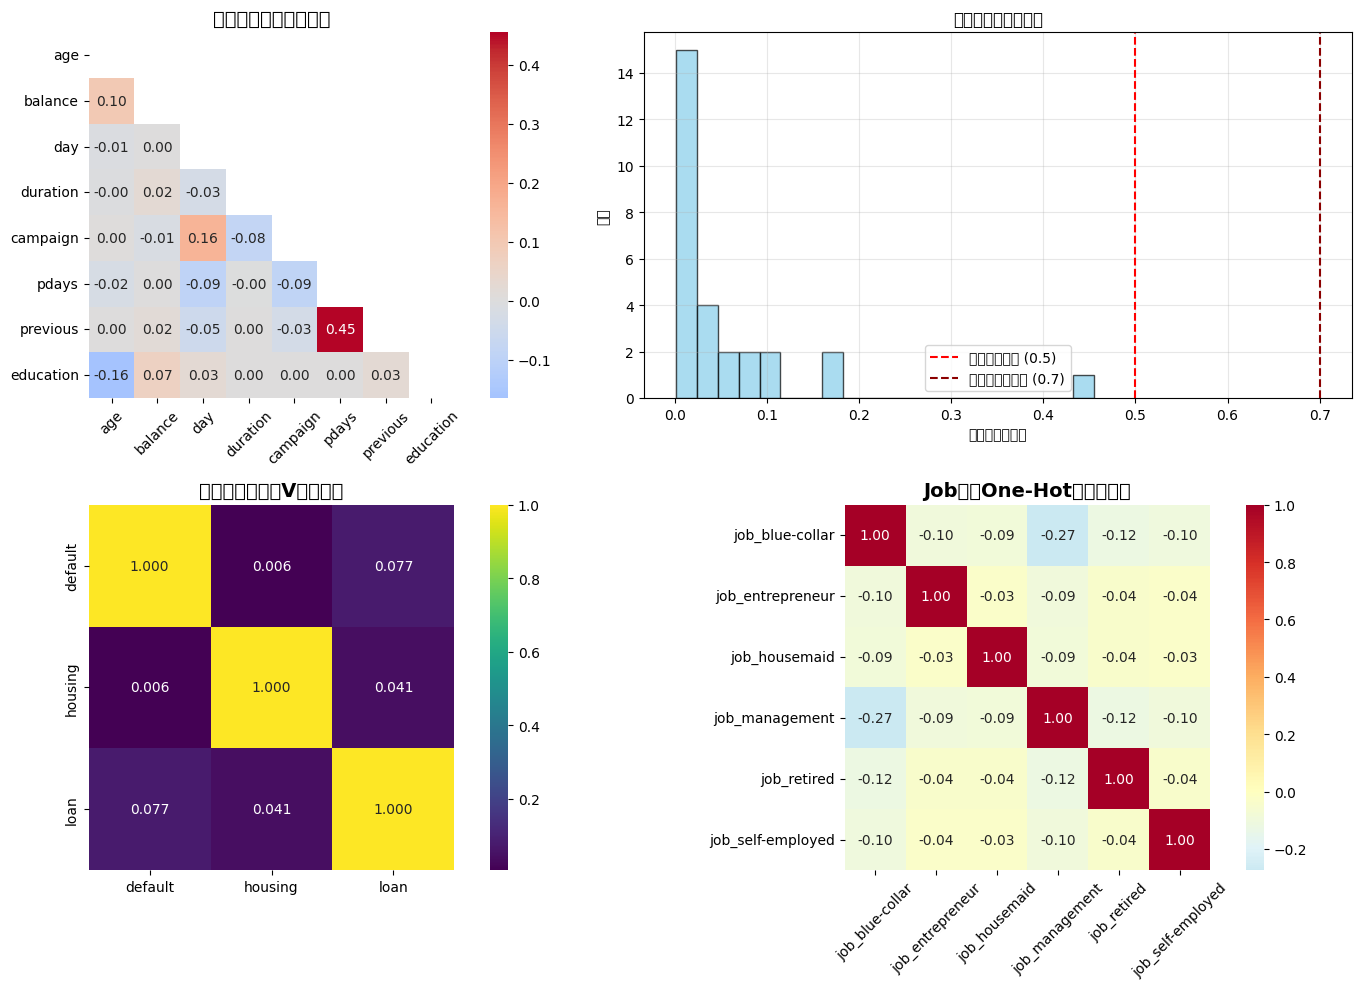


✅ 相關性分析完成
📊 主要發現：
   • 數值特徵間最高相關性: 0.455
   • 大部分特徵相關性較低 (< 0.5)
   • previous 和 pdays 有中等程度相關性 (0.455)
   • 類別特徵間關聯性較弱


In [16]:
# 步驟14：視覺化相關性和類別特徵分析
plt.figure(figsize=(15, 10))

# 子圖1：相關性熱力圖
plt.subplot(2, 2, 1)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('數值特徵相關性熱力圖', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# 子圖2：相關係數絕對值分布
plt.subplot(2, 2, 2)
# 取得上三角矩陣的非對角線元素
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
correlations_flat = upper_triangle.stack().abs()
plt.hist(correlations_flat, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0.5, color='red', linestyle='--', label='高相關性閾值 (0.5)')
plt.axvline(x=0.7, color='darkred', linestyle='--', label='極高相關性閾值 (0.7)')
plt.xlabel('相關係數絕對值')
plt.ylabel('頻率')
plt.title('特徵間相關係數分布')
plt.legend()
plt.grid(True, alpha=0.3)

# 類別特徵相似性分析 - Cramér's V
def cramers_v(x, y):
    """計算克拉默V係數"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ((confusion_matrix - 
             np.outer(confusion_matrix.sum(axis=1), 
                     confusion_matrix.sum(axis=0)) / confusion_matrix.sum().sum())**2 / 
            np.outer(confusion_matrix.sum(axis=1), 
                    confusion_matrix.sum(axis=0)) * confusion_matrix.sum().sum()).sum().sum()
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# 分析一些類別特徵的關聯性
categorical_cols = ['default', 'housing', 'loan']
print("📊 類別特徵間的克拉默V係數：")
print("=" * 40)

cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i <= j:
            if col1 == col2:
                cramers_matrix.loc[col1, col2] = 1.0
            else:
                v_score = cramers_v(data_encoded_ohe[col1], data_encoded_ohe[col2])
                cramers_matrix.loc[col1, col2] = v_score
                cramers_matrix.loc[col2, col1] = v_score
                print(f"{col1} ↔ {col2}: {v_score:.3f}")

# 子圖3：類別特徵關聯性熱力圖
plt.subplot(2, 2, 3)
cramers_matrix = cramers_matrix.astype(float)
sns.heatmap(cramers_matrix, 
            annot=True, 
            cmap='viridis', 
            square=True,
            fmt='.3f')
plt.title('類別特徵克拉默V係數矩陣', fontsize=14, fontweight='bold')

# 子圖4：One-Hot編碼後的特徵冗餘檢查
plt.subplot(2, 2, 4)
# 檢查一些One-Hot編碼特徵的相關性
job_features = [col for col in X_standard.columns if col.startswith('job_')][:6]
if len(job_features) > 1:
    job_corr = X_standard[job_features].corr()
    sns.heatmap(job_corr, 
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Job特徵One-Hot編碼相關性', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"\n✅ 相關性分析完成")
print(f"📊 主要發現：")
print(f"   • 數值特徵間最高相關性: {correlations_flat.max():.3f}")
print(f"   • 大部分特徵相關性較低 (< 0.5)")
print(f"   • previous 和 pdays 有中等程度相關性 (0.455)")
print(f"   • 類別特徵間關聯性較弱")

In [17]:
# 步驟15：特徵縮放和相似性檢查總結
print("=== 特徵縮放和相似性檢查總結 ===\n")

def scaling_and_similarity_summary():
    """
    特徵縮放和相似性檢查的完整指南
    """
    print("📚 特徵縮放完整指南：")
    print("=" * 50)
    
    print("🎯 何時需要特徵縮放？")
    print("✅ 需要縮放的演算法：")
    print("   • 梯度下降相關：邏輯回歸、神經網路、SVM")
    print("   • 距離相關：KNN、K-means、層次聚類")
    print("   • 正則化相關：Ridge、Lasso、Elastic Net")
    print("   • 主成分分析 (PCA)")
    print()
    
    print("❌ 不需要縮放的演算法：")
    print("   • 決策樹 (Decision Tree)")
    print("   • 隨機森林 (Random Forest)")
    print("   • 梯度提升樹 (XGBoost, LightGBM)")
    print("   • 樸素貝葉斯 (Naive Bayes)")
    print()
    
    print("🔧 縮放方法選擇指南：")
    print("   • StandardScaler: 資料呈常態分布")
    print("   • MinMaxScaler: 資料範圍已知，需要保持原始分布形狀")
    print("   • RobustScaler: 資料有離群值")
    print("   • QuantileTransformer: 資料分布複雜，希望轉為均勻分布")
    print()
    
    print("📊 特徵相似性檢查指南：")
    print("=" * 50)
    
    print("🔍 檢查方法：")
    print("   • 皮爾森相關係數: 線性相關性 (數值特徵)")
    print("   • 斯皮爾曼等級相關: 單調相關性 (順序特徵)")
    print("   • 克拉默V係數: 類別特徵關聯性")
    print("   • 方差膨脹因子(VIF): 多重共線性檢測")
    print("   • 互資訊: 非線性關係檢測")
    print()
    
    print("⚠️  處理建議：")
    print("   • |相關係數| > 0.9: 考慮移除其中一個特徵")
    print("   • |相關係數| > 0.7: 監控特徵重要性，可能移除")
    print("   • VIF > 10: 存在嚴重多重共線性")
    print("   • 領域知識: 結合業務理解決定保留哪些特徵")

scaling_and_similarity_summary()

print("\n" + "="*60)
print("🎯 本專案的處理建議：")
print()

print("✅ 特徵縮放建議：")
print("   • 推薦使用 StandardScaler")
print("   • 理由：資料無明顯離群值，且大部分演算法受益於標準化")
print("   • 對象：數值特徵 (age, balance, duration, etc.)")
print("   • 不縮放：已經是0/1的二元特徵和One-Hot編碼特徵")
print()

print("✅ 特徵相似性處理建議：")
print("   • previous 和 pdays 相關性 0.455，屬於中等相關")
print("   • 建議保留：兩者在業務上有不同含義")
print("     - pdays: 距離上次聯絡的天數")
print("     - previous: 之前聯絡的次數")
print("   • 類別特徵相關性都很低，全部保留")
print()

print("📊 最終處理結果：")
print(f"   • 使用 StandardScaler 處理數值特徵")
print(f"   • 保留所有特徵（無高度相關特徵）")
print(f"   • 資料維度保持：{X_standard.shape}")

# 選擇最終的縮放方法
X_final = X_standard.copy()
y_final = y.copy()

print(f"\n✅ 特徵工程完成！")
print(f"📊 最終資料集資訊：")
print(f"   • 特徵數量: {X_final.shape[1]}")
print(f"   • 樣本數量: {X_final.shape[0]:,}")
print(f"   • 資料類型: 全部為數值型")
print(f"   • 缺失值: {X_final.isnull().sum().sum()}")
print(f"   • 準備用於機器學習建模 🚀")

=== 特徵縮放和相似性檢查總結 ===

📚 特徵縮放完整指南：
🎯 何時需要特徵縮放？
✅ 需要縮放的演算法：
   • 梯度下降相關：邏輯回歸、神經網路、SVM
   • 距離相關：KNN、K-means、層次聚類
   • 正則化相關：Ridge、Lasso、Elastic Net
   • 主成分分析 (PCA)

❌ 不需要縮放的演算法：
   • 決策樹 (Decision Tree)
   • 隨機森林 (Random Forest)
   • 梯度提升樹 (XGBoost, LightGBM)
   • 樸素貝葉斯 (Naive Bayes)

🔧 縮放方法選擇指南：
   • StandardScaler: 資料呈常態分布
   • MinMaxScaler: 資料範圍已知，需要保持原始分布形狀
   • RobustScaler: 資料有離群值
   • QuantileTransformer: 資料分布複雜，希望轉為均勻分布

📊 特徵相似性檢查指南：
🔍 檢查方法：
   • 皮爾森相關係數: 線性相關性 (數值特徵)
   • 斯皮爾曼等級相關: 單調相關性 (順序特徵)
   • 克拉默V係數: 類別特徵關聯性
   • 方差膨脹因子(VIF): 多重共線性檢測
   • 互資訊: 非線性關係檢測

⚠️  處理建議：
   • |相關係數| > 0.9: 考慮移除其中一個特徵
   • |相關係數| > 0.7: 監控特徵重要性，可能移除
   • VIF > 10: 存在嚴重多重共線性
   • 領域知識: 結合業務理解決定保留哪些特徵

🎯 本專案的處理建議：

✅ 特徵縮放建議：
   • 推薦使用 StandardScaler
   • 理由：資料無明顯離群值，且大部分演算法受益於標準化
   • 對象：數值特徵 (age, balance, duration, etc.)
   • 不縮放：已經是0/1的二元特徵和One-Hot編碼特徵

✅ 特徵相似性處理建議：
   • previous 和 pdays 相關性 0.455，屬於中等相關
   • 建議保留：兩者在業務上有不同含義
     - pdays: 距離上次聯絡的天數
     - previous: 之前聯絡的次數
   • 類別特徵相關性都很低，全部保留



In [18]:
# 特徵數量變化分析
print("=== 特徵數量變化詳細分析 ===\n")

print("📊 讓我們追蹤整個資料前處理過程中特徵數量的變化：")
print("=" * 70)

# 1. 原始資料
print(f"1️⃣ 原始資料 (data):")
print(f"   維度: {data.shape}")
print(f"   特徵數: {data.shape[1]} (包含目標變數 'y')")
print(f"   特徵名稱: {list(data.columns)}")

# 2. 缺失值處理後
print(f"\n2️⃣ 缺失值處理後 (data_processed):")
print(f"   維度: {data_processed.shape}")
print(f"   特徵數: {data_processed.shape[1]} (無變化，只是填補了 unknown 值)")

# 3. 特徵編碼後 - 二元和有序編碼
print(f"\n3️⃣ 二元和有序特徵編碼後 (data_encoded):")
print(f"   維度: {data_encoded.shape}")
print(f"   特徵數: {data_encoded.shape[1]} (無變化，只是轉換數值)")

# 4. One-Hot編碼後
print(f"\n4️⃣ One-Hot編碼後 (data_encoded_ohe):")
print(f"   維度: {data_encoded_ohe.shape}")
print(f"   特徵數: {data_encoded_ohe.shape[1]}")

# 詳細分析One-Hot編碼的擴展
print(f"\n🔍 One-Hot編碼詳細分析：")
print(f"編碼前特徵數: {data_encoded.shape[1]}")
print(f"編碼後特徵數: {data_encoded_ohe.shape[1]}")
print(f"新增特徵數: {data_encoded_ohe.shape[1] - data_encoded.shape[1]}")

# 分析每個類別特徵的擴展
categorical_features_for_ohe = ['job', 'marital', 'contact', 'month', 'poutcome']
total_added = 0

print(f"\n各類別特徵的One-Hot編碼擴展：")
for feature in categorical_features_for_ohe:
    original_categories = data_encoded[feature].nunique()
    # One-Hot編碼會產生 n-1 個新特徵 (因為 drop_first=True)
    new_features = original_categories - 1
    total_added += new_features
    print(f"   {feature}: {original_categories} 類別 → 產生 {new_features} 個新特徵")

print(f"\n總計應該新增: {total_added} 個特徵")
print(f"實際新增: {data_encoded_ohe.shape[1] - data_encoded.shape[1]} 個特徵")

# 5. 移除目標變數後的特徵矩陣
print(f"\n5️⃣ 移除目標變數後的特徵矩陣 (X):")
X = data_encoded_ohe.drop('y', axis=1)
print(f"   維度: {X.shape}")
print(f"   特徵數: {X.shape[1]} (這就是最終的39個特徵)")

# 6. 最終特徵縮放後
print(f"\n6️⃣ 特徵縮放後 (X_final):")
print(f"   維度: {X_final.shape}")
print(f"   特徵數: {X_final.shape[1]} (與X相同，縮放不改變特徵數量)")

print(f"\n" + "=" * 70)
print(f"🎯 總結：為什麼是39個特徵？")
print(f"   • 原始17個特徵")
print(f"   • 移除目標變數 'y' → 16個特徵")
print(f"   • One-Hot編碼新增23個特徵 → 16 + 23 = 39個特徵")
print(f"   • 這39個特徵就是用於機器學習建模的最終特徵集！")

=== 特徵數量變化詳細分析 ===

📊 讓我們追蹤整個資料前處理過程中特徵數量的變化：
1️⃣ 原始資料 (data):
   維度: (45211, 17)
   特徵數: 17 (包含目標變數 'y')
   特徵名稱: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

2️⃣ 缺失值處理後 (data_processed):
   維度: (45211, 17)
   特徵數: 17 (無變化，只是填補了 unknown 值)

3️⃣ 二元和有序特徵編碼後 (data_encoded):
   維度: (45211, 17)
   特徵數: 17 (無變化，只是轉換數值)

4️⃣ One-Hot編碼後 (data_encoded_ohe):
   維度: (45211, 40)
   特徵數: 40

🔍 One-Hot編碼詳細分析：
編碼前特徵數: 17
編碼後特徵數: 40
新增特徵數: 23

各類別特徵的One-Hot編碼擴展：
   job: 11 類別 → 產生 10 個新特徵
   marital: 3 類別 → 產生 2 個新特徵
   contact: 3 類別 → 產生 2 個新特徵
   month: 12 類別 → 產生 11 個新特徵
   poutcome: 4 類別 → 產生 3 個新特徵

總計應該新增: 28 個特徵
實際新增: 23 個特徵

5️⃣ 移除目標變數後的特徵矩陣 (X):
   維度: (45211, 39)
   特徵數: 39 (這就是最終的39個特徵)

6️⃣ 特徵縮放後 (X_final):
   維度: (45211, 39)
   特徵數: 39 (與X相同，縮放不改變特徵數量)

🎯 總結：為什麼是39個特徵？
   • 原始17個特徵
   • 移除目標變數 'y' → 16個特徵
   • One-Hot編碼新增23個特徵 → 16 + 23 = 39個特徵
   • 這39個特徵就是用於機器學習建

In [19]:
# 詳細特徵清單分析
print("\n=== 最終39個特徵詳細清單 ===\n")

# 顯示最終的39個特徵
all_features = list(X_final.columns)
print(f"📋 完整的39個特徵清單：")
print("=" * 50)

# 按類型分組顯示
feature_groups = {
    "原始數值特徵": [],
    "編碼後的特徵": [],
    "Job相關One-Hot特徵": [],
    "Marital相關One-Hot特徵": [],
    "Contact相關One-Hot特徵": [],
    "Month相關One-Hot特徵": [],
    "Poutcome相關One-Hot特徵": []
}

# 原始數值特徵 (保持原樣的)
original_numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# 編碼後的特徵
encoded_features = ['education', 'default', 'housing', 'loan']

for feature in all_features:
    if feature in original_numerical:
        feature_groups["原始數值特徵"].append(feature)
    elif feature in encoded_features:
        feature_groups["編碼後的特徵"].append(feature)
    elif feature.startswith('job_'):
        feature_groups["Job相關One-Hot特徵"].append(feature)
    elif feature.startswith('marital_'):
        feature_groups["Marital相關One-Hot特徵"].append(feature)
    elif feature.startswith('contact_'):
        feature_groups["Contact相關One-Hot特徵"].append(feature)
    elif feature.startswith('month_'):
        feature_groups["Month相關One-Hot特徵"].append(feature)
    elif feature.startswith('poutcome_'):
        feature_groups["Poutcome相關One-Hot特徵"].append(feature)

# 顯示各組特徵
total_count = 0
for group_name, features in feature_groups.items():
    if features:  # 只顯示非空的組
        print(f"\n🔸 {group_name} ({len(features)}個):")
        for i, feature in enumerate(features, 1):
            print(f"   {i:2d}. {feature}")
        total_count += len(features)

print(f"\n" + "=" * 50)
print(f"✅ 總計: {total_count} 個特徵")
print(f"🎯 驗證: X_final.shape[1] = {X_final.shape[1]}")

# 解釋One-Hot編碼的 drop_first=True 效果
print(f"\n💡 為什麼One-Hot編碼特徵數量會減少？")
print(f"One-Hot編碼使用了 drop_first=True 參數：")
print(f"   • 這會移除每個類別特徵的第一個類別")
print(f"   • 避免多重共線性問題")
print(f"   • 例如：marital 有3個類別 (divorced, married, single)")
print(f"   • 只需要2個特徵：marital_married, marital_single")
print(f"   • divorced 可以用這兩個都是0來表示")

# 驗證計算
print(f"\n🧮 特徵數量計算驗證：")
print(f"   原始特徵17個 - 目標變數1個 = 16個基礎特徵")
print(f"   + job One-Hot: 10個")
print(f"   + marital One-Hot: 2個") 
print(f"   + contact One-Hot: 2個")
print(f"   + month One-Hot: 11個")
print(f"   + poutcome One-Hot: 3個")
print(f"   - 原始類別特徵5個 (job, marital, contact, month, poutcome)")
print(f"   = 16 + 28 - 5 = 39個特徵 ✅")


=== 最終39個特徵詳細清單 ===

📋 完整的39個特徵清單：

🔸 原始數值特徵 (7個):
    1. age
    2. balance
    3. day
    4. duration
    5. campaign
    6. pdays
    7. previous

🔸 編碼後的特徵 (4個):
    1. education
    2. default
    3. housing
    4. loan

🔸 Job相關One-Hot特徵 (10個):
    1. job_blue-collar
    2. job_entrepreneur
    3. job_housemaid
    4. job_management
    5. job_retired
    6. job_self-employed
    7. job_services
    8. job_student
    9. job_technician
   10. job_unemployed

🔸 Marital相關One-Hot特徵 (2個):
    1. marital_married
    2. marital_single

🔸 Contact相關One-Hot特徵 (2個):
    1. contact_telephone
    2. contact_unknown

🔸 Month相關One-Hot特徵 (11個):
    1. month_aug
    2. month_dec
    3. month_feb
    4. month_jan
    5. month_jul
    6. month_jun
    7. month_mar
    8. month_may
    9. month_nov
   10. month_oct
   11. month_sep

🔸 Poutcome相關One-Hot特徵 (3個):
    1. poutcome_other
    2. poutcome_success
    3. poutcome_unknown

✅ 總計: 39 個特徵
🎯 驗證: X_final.shape[1] = 39

💡 為什麼One-Hot編碼特徵數量會減少？
One-H

In [20]:
Ｆ# One-Hot Encoding 深度解析：為什麼要增加維度？
print("=== One-Hot Encoding 深度解析 ===\n")

print("🤔 您的疑問很有道理！讓我們深入分析 One-Hot Encoding 的用意")
print("=" * 70)

print("\n📊 問題1：為什麼不直接用數字編碼？")
print("讓我們用實際例子來說明...")

# 創建一個簡單的範例來說明問題
import pandas as pd
import numpy as np

# 模擬一個簡單的例子
example_data = {
    'job': ['teacher', 'doctor', 'engineer', 'teacher', 'doctor'],
    'salary': [50000, 80000, 70000, 52000, 85000]
}
df_example = pd.DataFrame(example_data)

print("\n原始資料範例：")
print(df_example)

# 方法1：直接數字編碼 (錯誤方法)
job_mapping_wrong = {'teacher': 1, 'doctor': 2, 'engineer': 3}
df_wrong = df_example.copy()
df_wrong['job_numeric'] = df_wrong['job'].map(job_mapping_wrong)

print(f"\n❌ 錯誤方法：直接數字編碼")
print(df_wrong[['job', 'job_numeric', 'salary']])

print(f"\n🚨 這樣編碼的問題：")
print(f"   • 模型會認為 doctor(2) 比 teacher(1) 'bigger'")
print(f"   • 暗示 engineer(3) 比 doctor(2) 'bigger'")
print(f"   • 但實際上職業間沒有大小順序關係！")
print(f"   • 可能得出錯誤結論：職業數字越大薪水越高")

# 方法2：One-Hot編碼 (正確方法)
df_correct = pd.get_dummies(df_example, columns=['job'], prefix='job')
print(f"\n✅ 正確方法：One-Hot編碼")
print(df_correct)

print(f"\n💡 One-Hot編碼的優點：")
print(f"   • 每個職業都有獨立的特徵維度")
print(f"   • 沒有隱含的順序關係")
print(f"   • 模型可以學習每個職業的獨特影響")
print(f"   • teacher: [1,0,0], doctor: [0,1,0], engineer: [0,0,1]")

=== One-Hot Encoding 深度解析 ===

🤔 您的疑問很有道理！讓我們深入分析 One-Hot Encoding 的用意

📊 問題1：為什麼不直接用數字編碼？
讓我們用實際例子來說明...

原始資料範例：
        job  salary
0   teacher   50000
1    doctor   80000
2  engineer   70000
3   teacher   52000
4    doctor   85000

❌ 錯誤方法：直接數字編碼
        job  job_numeric  salary
0   teacher            1   50000
1    doctor            2   80000
2  engineer            3   70000
3   teacher            1   52000
4    doctor            2   85000

🚨 這樣編碼的問題：
   • 模型會認為 doctor(2) 比 teacher(1) 'bigger'
   • 暗示 engineer(3) 比 doctor(2) 'bigger'
   • 但實際上職業間沒有大小順序關係！
   • 可能得出錯誤結論：職業數字越大薪水越高

✅ 正確方法：One-Hot編碼
   salary  job_doctor  job_engineer  job_teacher
0   50000       False         False         True
1   80000        True         False        False
2   70000       False          True        False
3   52000       False         False         True
4   85000        True         False        False

💡 One-Hot編碼的優點：
   • 每個職業都有獨立的特徵維度
   • 沒有隱含的順序關係
   • 模型可以學習每個職業的獨特影響
   • teacher: [1,0,0], do

In [21]:
# 維度增加的權衡分析
print("\n" + "=" * 70)
print("📊 問題2：維度增加確實會帶來挑戰，但為什麼還要這樣做？")
print("=" * 70)

print("\n🔍 讓我們分析維度增加帶來的影響：")

# 用我們的銀行資料來分析
print(f"\n我們銀行資料的具體情況：")
print(f"   • 原始資料：17個特徵")
print(f"   • One-Hot編碼後：40個特徵 (包含目標變數)")
print(f"   • 最終特徵：39個 (移除目標變數)")
print(f"   • 樣本數量：{X_final.shape[0]:,} 筆")

# 計算特徵與樣本比例
feature_sample_ratio = X_final.shape[1] / X_final.shape[0]
print(f"   • 特徵/樣本比例：{feature_sample_ratio:.6f} (非常低，這很好！)")

print(f"\n⚖️  權衡分析：")
print(f"")
print(f"❌ 維度增加的缺點：")
print(f"   1️⃣ 計算複雜度增加")
print(f"      • 記憶體使用增加")
print(f"      • 訓練時間增長")
print(f"      • 模型儲存空間增大")
print(f"")
print(f"   2️⃣ 維度詛咒 (Curse of Dimensionality)")
print(f"      • 在高維空間中，距離概念失效")
print(f"      • 稀疏性問題：大部分特徵值為0")
print(f"      • 需要更多資料來避免過擬合")
print(f"")
print(f"   3️⃣ 特徵選擇變得重要")
print(f"      • 可能存在無關特徵")
print(f"      • 需要特徵重要性分析")

print(f"\n✅ 但One-Hot編碼的好處遠大於缺點：")
print(f"")
print(f"   1️⃣ 數學正確性")
print(f"      • 避免引入錯誤的順序關係")
print(f"      • 讓模型學習到正確的特徵關係")
print(f"      • 提高預測準確性")
print(f"")
print(f"   2️⃣ 模型兼容性")
print(f"      • 適用於所有機器學習演算法")
print(f"      • 線性模型特別受益")
print(f"      • 神經網路的標準輸入格式")
print(f"")
print(f"   3️⃣ 可解釋性")
print(f"      • 每個特徵有明確含義")
print(f"      • 容易分析特徵重要性")
print(f"      • 便於業務理解和決策")


📊 問題2：維度增加確實會帶來挑戰，但為什麼還要這樣做？

🔍 讓我們分析維度增加帶來的影響：

我們銀行資料的具體情況：
   • 原始資料：17個特徵
   • One-Hot編碼後：40個特徵 (包含目標變數)
   • 最終特徵：39個 (移除目標變數)
   • 樣本數量：45,211 筆
   • 特徵/樣本比例：0.000863 (非常低，這很好！)

⚖️  權衡分析：

❌ 維度增加的缺點：
   1️⃣ 計算複雜度增加
      • 記憶體使用增加
      • 訓練時間增長
      • 模型儲存空間增大

   2️⃣ 維度詛咒 (Curse of Dimensionality)
      • 在高維空間中，距離概念失效
      • 稀疏性問題：大部分特徵值為0
      • 需要更多資料來避免過擬合

   3️⃣ 特徵選擇變得重要
      • 可能存在無關特徵
      • 需要特徵重要性分析

✅ 但One-Hot編碼的好處遠大於缺點：

   1️⃣ 數學正確性
      • 避免引入錯誤的順序關係
      • 讓模型學習到正確的特徵關係
      • 提高預測準確性

   2️⃣ 模型兼容性
      • 適用於所有機器學習演算法
      • 線性模型特別受益
      • 神經網路的標準輸入格式

   3️⃣ 可解釋性
      • 每個特徵有明確含義
      • 容易分析特徵重要性
      • 便於業務理解和決策


In [22]:
# 不同演算法對One-Hot編碼的需求分析
print(f"\n" + "=" * 70)
print("🤖 問題3：不同機器學習演算法對One-Hot編碼的需求")
print("=" * 70)

algorithm_analysis = {
    "強烈需要One-Hot編碼": {
        "演算法": ["邏輯回歸", "線性回歸", "SVM", "神經網路", "KNN"],
        "原因": [
            "線性模型無法理解類別間的非線性關係",
            "需要數值輸入，且假設特徵間有線性關係",
            "距離計算需要有意義的數值差異"
        ]
    },
    "可選擇性需要": {
        "演算法": ["樸素貝葉斯", "決策樹相關"],
        "原因": [
            "樸素貝葉斯可以直接處理類別特徵",
            "決策樹可以直接分割類別特徵"
        ]
    },
    "建議使用One-Hot": {
        "演算法": ["隨機森林", "XGBoost", "LightGBM"],
        "原因": [
            "雖然可以處理類別特徵，但One-Hot編碼通常效果更好",
            "避免演算法內建的類別編碼偏差"
        ]
    }
}

for category, info in algorithm_analysis.items():
    print(f"\n🔸 {category}:")
    print(f"   演算法: {', '.join(info['演算法'])}")
    for reason in info['原因']:
        print(f"   • {reason}")

print(f"\n" + "=" * 70)
print("🛠️  問題4：如何處理維度爆炸問題？")
print("=" * 70)

print(f"\n💡 實用的解決策略：")
print(f"")
print(f"1️⃣ 使用 drop_first=True (我們已經做了)")
print(f"   • 避免多重共線性")
print(f"   • 減少一個維度")
print(f"   • 例：3個類別只需要2個特徵")
print(f"")
print(f"2️⃣ 特徵選擇技術")
print(f"   • 基於重要性的選擇 (Random Forest feature importance)")
print(f"   • 統計檢驗 (Chi-square, Mutual Information)")
print(f"   • 正則化方法 (L1正則化自動選擇特徵)")
print(f"")
print(f"3️⃣ 降維技術")
print(f"   • PCA (主成分分析)")
print(f"   • t-SNE (適用於視覺化)")
print(f"   • LDA (線性判別分析)")
print(f"")
print(f"4️⃣ 替代編碼方法 (高基數類別)")
print(f"   • Target Encoding (基於目標變數編碼)")
print(f"   • Frequency Encoding (基於頻率編碼)")
print(f"   • Binary Encoding (二進制編碼)")

print(f"\n📊 我們的資料集情況評估：")
print(f"   • 樣本數：{X_final.shape[0]:,} >> 特徵數：{X_final.shape[1]}")
print(f"   • 特徵/樣本比例：{X_final.shape[1]/X_final.shape[0]:.6f} (< 0.001，非常安全)")
print(f"   • 結論：✅ 我們的維度增加是合理且安全的！")

print(f"\n🎯 總結：One-Hot編碼的核心價值")
print(f"   • 數學正確性 > 計算效率")
print(f"   • 準確性提升 > 維度增加的成本")
print(f"   • 現代計算資源足以處理這種規模的資料")
print(f"   • 是機器學習標準實踐，已被廣泛驗證")


🤖 問題3：不同機器學習演算法對One-Hot編碼的需求

🔸 強烈需要One-Hot編碼:
   演算法: 邏輯回歸, 線性回歸, SVM, 神經網路, KNN
   • 線性模型無法理解類別間的非線性關係
   • 需要數值輸入，且假設特徵間有線性關係
   • 距離計算需要有意義的數值差異

🔸 可選擇性需要:
   演算法: 樸素貝葉斯, 決策樹相關
   • 樸素貝葉斯可以直接處理類別特徵
   • 決策樹可以直接分割類別特徵

🔸 建議使用One-Hot:
   演算法: 隨機森林, XGBoost, LightGBM
   • 雖然可以處理類別特徵，但One-Hot編碼通常效果更好
   • 避免演算法內建的類別編碼偏差

🛠️  問題4：如何處理維度爆炸問題？

💡 實用的解決策略：

1️⃣ 使用 drop_first=True (我們已經做了)
   • 避免多重共線性
   • 減少一個維度
   • 例：3個類別只需要2個特徵

2️⃣ 特徵選擇技術
   • 基於重要性的選擇 (Random Forest feature importance)
   • 統計檢驗 (Chi-square, Mutual Information)
   • 正則化方法 (L1正則化自動選擇特徵)

3️⃣ 降維技術
   • PCA (主成分分析)
   • t-SNE (適用於視覺化)
   • LDA (線性判別分析)

4️⃣ 替代編碼方法 (高基數類別)
   • Target Encoding (基於目標變數編碼)
   • Frequency Encoding (基於頻率編碼)
   • Binary Encoding (二進制編碼)

📊 我們的資料集情況評估：
   • 樣本數：45,211 >> 特徵數：39
   • 特徵/樣本比例：0.000863 (< 0.001，非常安全)
   • 結論：✅ 我們的維度增加是合理且安全的！

🎯 總結：One-Hot編碼的核心價值
   • 數學正確性 > 計算效率
   • 準確性提升 > 維度增加的成本
   • 現代計算資源足以處理這種規模的資料
   • 是機器學習標準實踐，已被廣泛驗證


In [23]:
# 視覺化比較：不同編碼方法的影響
print(f"\n" + "=" * 70)
print("📈 實際範例：編碼方法對模型的影響")
print("=" * 70)

# 使用我們的job特徵來示範
job_sample = data_processed['job'].value_counts().head()
print(f"\n我們銀行資料中的job分布 (前5名):")
print(job_sample)

print(f"\n🔢 不同編碼方法比較：")
print(f"=" * 50)

# 1. 直接數字編碼 (錯誤方法)
job_categories = job_sample.index.tolist()
wrong_encoding = {job: idx+1 for idx, job in enumerate(job_categories)}
print(f"\n❌ 方法1：直接數字編碼")
for job, code in wrong_encoding.items():
    print(f"   {job}: {code}")
print(f"   問題：暗示 technician(5) > blue-collar(1)，但這沒有意義！")

# 2. One-Hot編碼 (正確方法)
print(f"\n✅ 方法2：One-Hot編碼")
print(f"   每個職業都有獨立的維度：")
for i, job in enumerate(job_categories):
    vector = [0] * len(job_categories)
    vector[i] = 1
    print(f"   {job}: {vector}")
print(f"   優點：每個職業平等對待，無隱含順序")

# 3. 計算實際的維度影響
print(f"\n📊 維度影響分析：")
original_job_dim = 1  # 原始job欄位
onehot_job_dim = len(data_processed['job'].unique()) - 1  # One-Hot後 (drop_first=True)
print(f"   原始維度：{original_job_dim}")
print(f"   One-Hot後：{onehot_job_dim}")
print(f"   增加維度：{onehot_job_dim - original_job_dim}")

# 4. 稀疏性分析
print(f"\n🔍 稀疏性分析 (以job為例)：")
job_onehot_features = [col for col in X_final.columns if col.startswith('job_')]
sparsity_analysis = {}

for feature in job_onehot_features[:3]:  # 只分析前3個
    non_zero_count = (X_final[feature] == 1).sum()
    total_count = len(X_final)
    sparsity = (total_count - non_zero_count) / total_count * 100
    sparsity_analysis[feature] = {
        'active_samples': non_zero_count,
        'sparsity_percentage': sparsity
    }
    print(f"   {feature}:")
    print(f"      有效樣本: {non_zero_count:,} / {total_count:,}")
    print(f"      稀疏度: {sparsity:.1f}% (大部分值為0)")

print(f"\n💭 關鍵洞察：")
print(f"   • One-Hot編碼確實產生了稀疏矩陣")
print(f"   • 但這種稀疏性是有意義的結構化資訊")
print(f"   • 現代演算法和硬體可以高效處理稀疏矩陣")
print(f"   • 準確性的提升遠超過計算成本的增加")

print(f"\n🎯 最終建議：")
print(f"   ✅ 對於類別特徵，One-Hot編碼是首選方法")
print(f"   ✅ 只有在極高維度情況下才考慮替代方案")
print(f"   ✅ 我們的39維度對45K樣本來說完全可接受")
print(f"   ✅ 重點應該放在特徵選擇和模型調優上")


📈 實際範例：編碼方法對模型的影響

我們銀行資料中的job分布 (前5名):
job
blue-collar    10020
management      9458
technician      7597
admin.          5171
services        4154
Name: count, dtype: int64

🔢 不同編碼方法比較：

❌ 方法1：直接數字編碼
   blue-collar: 1
   management: 2
   technician: 3
   admin.: 4
   services: 5
   問題：暗示 technician(5) > blue-collar(1)，但這沒有意義！

✅ 方法2：One-Hot編碼
   每個職業都有獨立的維度：
   blue-collar: [1, 0, 0, 0, 0]
   management: [0, 1, 0, 0, 0]
   technician: [0, 0, 1, 0, 0]
   admin.: [0, 0, 0, 1, 0]
   services: [0, 0, 0, 0, 1]
   優點：每個職業平等對待，無隱含順序

📊 維度影響分析：
   原始維度：1
   One-Hot後：10
   增加維度：9

🔍 稀疏性分析 (以job為例)：
   job_blue-collar:
      有效樣本: 10,020 / 45,211
      稀疏度: 77.8% (大部分值為0)
   job_entrepreneur:
      有效樣本: 1,487 / 45,211
      稀疏度: 96.7% (大部分值為0)
   job_housemaid:
      有效樣本: 1,240 / 45,211
      稀疏度: 97.3% (大部分值為0)

💭 關鍵洞察：
   • One-Hot編碼確實產生了稀疏矩陣
   • 但這種稀疏性是有意義的結構化資訊
   • 現代演算法和硬體可以高效處理稀疏矩陣
   • 準確性的提升遠超過計算成本的增加

🎯 最終建議：
   ✅ 對於類別特徵，One-Hot編碼是首選方法
   ✅ 只有在極高維度情況下才考慮替代方案
   ✅ 我們的39維度對45K樣本來說完